In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [74]:
data = load_breast_cancer(as_frame=True)
data = data.frame

In [75]:
n_db = 5
db_list = []
n_samples_per_db = int(len(data) / n_db)

In [76]:
# Create n databases
# sample size per databse = population size / no. of databases
for i in range(0, n_db):
    db_i = data.sample(n=n_samples_per_db, replace=False, random_state=1)
    db_list.append(db_i)
    data.drop(db_i.index)

In [77]:
len(db_list)

5

In [94]:
for i, db in enumerate(db_list): 
    # Print ratio p / n for each db. 
    print(
        f'The P/N Ratio of DB {i+1}: ',  
        db.target.value_counts()[1] / db.target.value_counts()[0]
        )


The P/N Ratio of DB 1:  1.6904761904761905
The P/N Ratio of DB 2:  1.6904761904761905
The P/N Ratio of DB 3:  1.6904761904761905
The P/N Ratio of DB 4:  1.6904761904761905
The P/N Ratio of DB 5:  1.6904761904761905


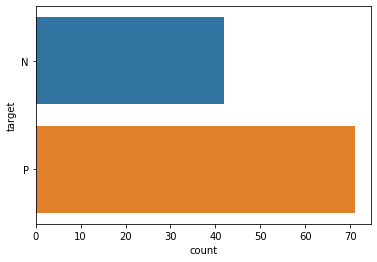

In [67]:
# db_list[0].target.describe()
# Check class balance after sampling with pandas. 
# The class balance barely changes after the simple sampling with pandas. 
g_ = sns.countplot(y=db_list[2].target)
g_.set_yticklabels(['N','P'])
plt.show()

'''
    Classes 2
    Samples per class: 212(M),357(B)
    Samples total: 569
    Dimensionality: 30
    Features: real, positive
'''

In [68]:
# Ratio P to N
357 / 212

1.6839622641509433

In [14]:
df = pd.DataFrame(dict(
    A=[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    B=range(10)
))

In [25]:
df.sample(frac=0.2, replace=False, random_state=1)

,A,B,freq,weight
2,0,2,8,0.117647
9,0,9,8,0.117647


In [20]:
df['freq'] = df.groupby('A')['A'].transform('count')
df['weight'] = df.freq / sum(df.freq)
df

,A,B,freq,weight
0,1,0,2,0.029412
1,1,1,2,0.029412
2,0,2,8,0.117647
3,0,3,8,0.117647
4,0,4,8,0.117647
5,0,5,8,0.117647
6,0,6,8,0.117647
7,0,7,8,0.117647
8,0,8,8,0.117647
9,0,9,8,0.117647


1.0

In [22]:
sampledf = df.sample(n=5, weights = df.weight)

In [23]:
sampledf

,A,B,freq,weight
5,0,5,8,0.117647
9,0,9,8,0.117647
7,0,7,8,0.117647
2,0,2,8,0.117647
3,0,3,8,0.117647


In [24]:
df.drop(sampledf.index).sample(n=5, weights = df.freq)

,A,B,freq,weight
8,0,8,8,0.117647
6,0,6,8,0.117647
4,0,4,8,0.117647
0,1,0,2,0.029412
1,1,1,2,0.029412
